## **Question 1**

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import operator
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

class DecisionTree:
    def __init__(self):
        self.tree = None
        self.features = list
        self.XTrain = np.array
        self.yTrain = np.array
        self.num_feats = int
        self.train_size = int
        self.nodes = 0

    def fit(self, X, y):
        self.XTrain = X
        self.yTrain = y
        self.features = list(X.columns)
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        X_copy = X.copy()
        X_copy['category'] = y.copy()

        self.tree = self.make_subtree(X_copy)
        s = str(self.tree)
        s = s.replace("\'", "\"")
        json_object = json.loads(s)
        print(json.dumps(json_object, indent=2))

    def make_subtree(self, X, tree=None):
        feature, cutoff = self.find_best_split(X)
        categories, count = np.unique(X['category'], return_counts=True)
        if tree is None:
            tree = {feature: {}}
        if cutoff == None:
          tree[feature]['>=' + str(-1.5) + ' then'] = 1
          return tree
        
        self.nodes +=1  

        # Left Child
        split = self.split_table(X, feature, cutoff, operator.ge)
        categories, count = np.unique(split['category'], return_counts=True)

        if len(count) == 1:  # all are same category
            tree[feature]['>=' + str(cutoff) + ' then'] = categories[0]
        else:
            tree[feature]['>=' + str(cutoff) + ' then'] = self.make_subtree(split)

        # Right Child
        split = self.split_table(X, feature, cutoff, operator.lt)
        categories, count = np.unique(split['category'], return_counts=True)

        if len(count) == 1:  # all are same category
            tree[feature]['else ' + '<' + str(cutoff)] = categories[0]
        else:
            tree[feature]['else ' + '<' + str(cutoff)] = self.make_subtree(split)

        return tree

    def find_best_split(self, data):
        info_gainratio = []
        thresholds = []

        for feature in list(data.columns[:-1]):
            e_parent = self.entropy(data)  # H(T)
            info_gain_ratio, threshold = self.entropy_feature(data, feature, e_parent)  # H(T|a)

            info_gainratio.append(info_gain_ratio)
            thresholds.append(threshold)
         
        return data.columns[:-1][np.argmax(info_gainratio)], thresholds[np.argmax(info_gainratio)]

    def entropy(self, data):
        entropy = 0
        for target in np.unique(data['category']):
            probability = data['category'].value_counts()[target] / len(data['category'])
            entropy += -probability * np.log2(probability)

        return entropy

    def entropy_feature(self, data, feature, e_parent):
        threshold = None
        info_gain_ratio = 0

        for pivot in np.unique(data[feature]):
            cur_entropy = 0
            cutoff = pivot
            weightage_entropy = 0
            for operation in [operator.lt, operator.ge]:
                entropy_feature = 0
                den = 0
                for category in np.unique(data['category']):
                    num = len(data[feature][operation(data[feature], cutoff)][data['category'] == category])
                    den = len(data[feature][operation(data[feature], cutoff)])

                    if den == 0:
                        continue
                    probability = num / den
                    if probability > 0:
                        entropy_feature += -probability * np.log2(probability)

                weightage = den / len(data)
                cur_entropy += weightage * entropy_feature
                if weightage > 0:
                    weightage_entropy += -weightage * np.log2(weightage)
            if weightage_entropy == 0:
                # print("Mutual Information: {}\n".format(e_parent - cur_entropy))
                # print("Split at: {}\n".format(cutoff))
                continue
            cur_info_gain_ratio = (e_parent - cur_entropy) / weightage_entropy
            # print("Information Gain: {}\n".format(cur_info_gain_ratio))
            # print("Split at: {}".format(cutoff))

                
            if cur_info_gain_ratio > info_gain_ratio:
                info_gain_ratio = cur_info_gain_ratio
                threshold = cutoff

        return info_gain_ratio, threshold

    def split_table(self, df, feature, pivot, operation):
        return df[operation(df[feature], pivot)].reset_index(drop=True)

    def predict(self, X):
        results = []
        lookup = {key: i for i, key in enumerate(list(X.columns))}

        for i in range(len(X)):
            results.append(self.predict_X(lookup, X.iloc[i], self.tree))

        return np.array(results)

    def predict_X(self, lookup, x, tree):
        for node in tree.keys():
            val = x[node]
            cutoff = str(list(tree[node].keys())[0]).split('>=')[1].split(' ')[0]

            if val >= float(cutoff):  # Left Child
                tree = tree[node]['>=' + cutoff + ' then']
            else:  # Right Child
                tree = tree[node]['else ' + '<' + cutoff]

            prediction = str

            if type(tree) is dict:
                prediction = self.predict_X(lookup, x, tree)
            else:
                predict = tree
                return predict

        return prediction


def error_score(ytrue, ypred):
    return round(float(sum(ypred != ytrue)) / float(len(ytrue)) * 100, 2)


### **Question 2**

Question 2_3

In [ ]:
data = pd.read_table('Druns.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])
# Split Features and target
from sklearn.model_selection import train_test_split
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8192, shuffle = True)
dt_clf = DecisionTree()
dt_clf.fit(X,y)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)


Question 2_4

Number of nodes 2


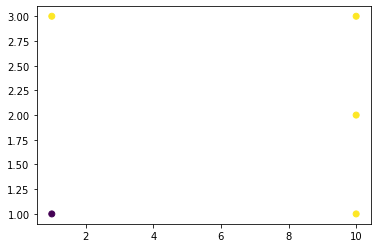

In [17]:
data = pd.read_table('D3leaves.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])
# Split Features and target
from sklearn.model_selection import train_test_split
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8192, shuffle = True)
dt_clf = DecisionTree()
dt_clf.fit(X,y)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print("Number of nodes", dt_clf.nodes)


Question 2_5

D1

Streaming output truncated to the last 5000 lines.
Information Gain: 7.910852700394607e-05

Split at: 0.358269
Information Gain: 9.503334152029758e-05

Split at: 0.359769
Information Gain: 0.00011237993645236119

Split at: 0.359956
Information Gain: 0.00013113975301892497

Split at: 0.360075
Information Gain: 0.00015130439518227856

Split at: 0.362395
Information Gain: 0.00017286562736150716

Split at: 0.363346
Information Gain: 0.0001958153721956007

Split at: 0.363453
Information Gain: 0.00022014570835200226

Split at: 0.363694
Information Gain: 0.0002458488683798528

Split at: 0.364292
Information Gain: 0.0002729172366101943

Split at: 0.365878
Information Gain: 0.000301343347097153

Split at: 0.368028
Information Gain: 0.0003311198816045532

Split at: 0.368879
Information Gain: 0.00036223966763167037

Split at: 0.36903
Information Gain: 0.00039469567648272

Split at: 0.37021
Information Gain: 0.00042848102137454773

Split at: 0.371416
Information Gain: 0.0002771302532478

Split at:

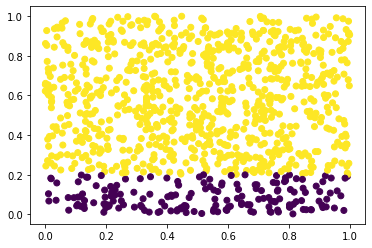

In [9]:
data = pd.read_table('D1.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])
# Split Features and target
from sklearn.model_selection import train_test_split
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8192, shuffle = True)
dt_clf = DecisionTree()
dt_clf.fit(X,y)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print("Number of nodes", dt_clf.nodes)


D2

In [ ]:
data = pd.read_table('D2.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])
# Split Features and target
from sklearn.model_selection import train_test_split
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8192, shuffle = True)
dt_clf = DecisionTree()
dt_clf.fit(X,y)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print("Number of nodes", dt_clf.nodes)


Question 2_6

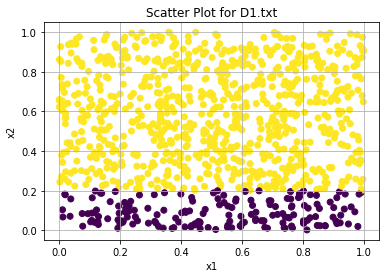

In [83]:
data = pd.read_table('D1.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])


plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.title("Scatter Plot for D1.txt")
plt.show()

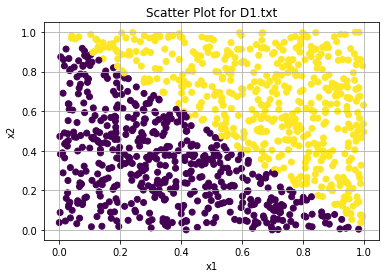

In [84]:
data = pd.read_table('D2.txt', sep=" ", header=None, names=["X1", "X2", "y"])
plt.scatter(data['X1'], data['X2'], c=data['y'])

plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.title("Scatter Plot for D1.txt")
plt.show()

Question 2_7

In [85]:
data = pd.read_table('Dbig.txt', sep=" ", header=None, names=["X1", "X2", "Y"])
# Split Features and target
from sklearn.model_selection import train_test_split
X, y = data.drop([data.columns[-1]], axis=1), data[data.columns[-1]]

D8192

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8192, shuffle = True)
np.shape(X_train)
dt_clf = DecisionTree()
dt_clf.fit(X_train, y_train)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)


plt.scatter(X_train['X1'], X_train['X2'], c = ['y' if i==0 else 'r' for i in y_train])
plt.show()
y_hat = dt_clf.predict(X_test)
plt.scatter(X_test['X1'], X_test['X2'], c = ['y' if i==0 else 'r' for i in y_hat])
plt.show()

D32 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.0032, shuffle = True)
np.shape(X_train)
dt_clf = DecisionTree()
dt_clf.fit(X_train, y_train)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)


plt.scatter(X_train['X1'], X_train['X2'], c = ['y' if i==0 else 'r' for i in y_train])
plt.show()
y_hat = dt_clf.predict(X_test)
plt.scatter(X_test['X1'], X_test['X2'], c = ['y' if i==0 else 'r' for i in y_hat])
plt.show()

D128

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.0128, shuffle = True)
np.shape(X_train)
dt_clf = DecisionTree()
dt_clf.fit(X_train, y_train)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)

plt.scatter(X_train['X1'], X_train['X2'], c = ['y' if i==0 else 'r' for i in y_train])
plt.show()
y_hat = dt_clf.predict(X_test)
plt.scatter(X_test['X1'], X_test['X2'], c = ['y' if i==0 else 'r' for i in y_hat])
plt.show()

D512

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.0512, shuffle = True)
np.shape(X_train)
dt_clf = DecisionTree()
dt_clf.fit(X_train, y_train)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)

plt.scatter(X_train['X1'], X_train['X2'], c = ['y' if i==0 else 'r' for i in y_train])
plt.show()
y_hat = dt_clf.predict(X_test)
plt.scatter(X_test['X1'], X_test['X2'], c = ['y' if i==0 else 'r' for i in y_hat])
plt.show()

D2048

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2048, shuffle = True)
np.shape(X_train)
dt_clf = DecisionTree()
dt_clf.fit(X_train, y_train)
    #print("\nTrain Error: {}".format(error_score(y, dt_clf.predict(X))))
print(dt_clf.nodes)

plt.scatter(X_train['X1'], X_train['X2'], c = ['y' if i==0 else 'r' for i in y_train])
plt.show()
y_hat = dt_clf.predict(X_test)
plt.scatter(X_test['X1'], X_test['X2'], c = ['y' if i==0 else 'r' for i in y_hat])
plt.show()

### **Question 3**

In [68]:
filename = 'Dbig.txt'
data = np.loadtxt(filename, delimiter=' ', dtype=str)
print(np.shape(data))
X = data[:,0:2]
y = data[:,-1]
def randomDataSplit(data, n):
  np.random.shuffle(data)
  train = data[0:n,:]
  test = data[n:,:]
  return train[:,0:2], test[:,0:2], train[:,-1], test[:,-1]

(10000, 3)


In [69]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [75]:
def DecisionTreeClassiferUsingsklearn(n):
    X_train, X_test, y_train, y_test = randomDataSplit(data, n)

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    errors = fp+fn
    n_nodes = clf.tree_.node_count
    error = 1 - clf.score(X_test,y_test)
    return errors, n_nodes, error

In [76]:
errors1, n_nodes1, errorsp1 = DecisionTreeClassiferUsingsklearn(32) #D32
errors2, n_nodes2, errorsp2 = DecisionTreeClassiferUsingsklearn(128) #D128
errors3, n_nodes3, errorsp3 = DecisionTreeClassiferUsingsklearn(512) #D512
errors4, n_nodes4, errorsp4 = DecisionTreeClassiferUsingsklearn(2048) #D2048
errors5, n_nodes5, errorsp5 = DecisionTreeClassiferUsingsklearn(8192) #8192

In [77]:

print("D32")
print("Errors: ", errors1)
print("Error: " + str(format(errorsp1*100,'.2f')) + '%')
print("Number of nodes: ", n_nodes1)
print("------------------------------")
print("D128")
print("Errors: ", errors2)
print("Error: " + str(format(errorsp2*100,'.2f')) + '%')
print("Number of nodes: ", n_nodes2)
print("------------------------------")
print("D512")
print("Errors: ", errors3)
print("Error: " + str(format(errorsp3*100,'.2f')) + '%')
print("Number of nodes: ", n_nodes3)
print("------------------------------")
print("D2048")
print("Errors: ", errors4)
print("Error: " + str(format(errorsp4*100,'.2f')) + '%')
print("Number of nodes: ", n_nodes4)
print("------------------------------")
print("D8192")
print("Errors: ", errors5)
print("Error: " + str(format(errorsp5*100,'.2f')) + '%')
print("Number of nodes: ", n_nodes5)

D32
Errors:  1003
Error: 10.06%
Number of nodes:  9
------------------------------
D128
Errors:  841
Error: 8.52%
Number of nodes:  25
------------------------------
D512
Errors:  545
Error: 5.74%
Number of nodes:  55
------------------------------
D2048
Errors:  208
Error: 2.62%
Number of nodes:  119
------------------------------
D8192
Errors:  22
Error: 1.22%
Number of nodes:  263


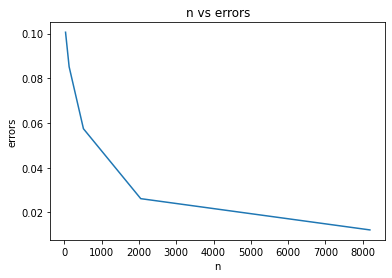

In [78]:
error = [errorsp1, errorsp2, errorsp3, errorsp4, errorsp5]
n = [32,128,512,2048,8192]

import matplotlib.pyplot as plt
plt.xlabel('n')
plt.ylabel('errors')
plt.title('n vs errors')
plt.plot(n,error)

## **Question 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

theta = 0
eps = np.finfo(float).eps


def lagrangify(X, Y):
    def ansf(x):
        ans = 0
        for xj, yj in zip(X, Y):
            l = 1
            for xi, yi in zip(X, Y):
                if xj != xi:
                    l *= (x - xi) / (xj - xi)
            ans += l * yj

        return ans

    return ansf


def gaussian(mu, sigma):
    lower, upper = 0, 4 * math.pi
    Xtrain = stats.truncnorm(
        (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(100)
    Ytrain = np.cos(Xtrain + (theta * math.pi) / (10 + eps))
    f_model = lagrangify(Xtrain, Ytrain)
    Xtest = stats.truncnorm(
        (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma).rvs(100)
    Ytest = np.cos(Xtest + (theta * math.pi) / (10 + eps))

    MSE = np.square(np.subtract(Ytrain, f_model(Xtrain))).mean()
    rsme = math.sqrt(MSE)
    print("Gaussian train RSME error: {}".format(rsme))

    MSE = np.square(np.subtract(Ytest, f_model(Xtest))).mean()

    rsme = math.sqrt(MSE)
    plt.scatter(Xtest, Ytest)
    plt.scatter(Xtest, f_model(Xtest))
    #plt.show()
    print("Sigma: {}".format(sigma))
    print("Gaussian test RSME error: {}".format(rsme))

    return rsme


if __name__ == '__main__':
    print('\n--------------Start of Q3------------------------')
    plt.xlim(0, 4 * math.pi)
    plt.ylim(-1, 1)
    Xtrain = np.random.uniform(0, 4*math.pi, size=100)
    Ytrain = np.cos(Xtrain + (theta * math.pi) / (10 + eps))
    Xtest = np.random.uniform(0, math.pi, size=100)
    Ytest = np.cos(Xtest + (theta * math.pi) / (10 + eps))
    f_model = lagrangify(Xtrain, Ytrain)

    MSE = np.square(np.subtract(Ytrain, f_model(Xtrain))).mean()

    rsme = math.sqrt(MSE)
    print("Uniform train RSME error: {}".format(rsme))

    MSE = np.square(np.subtract(Ytest, f_model(Xtest))).mean()

    rsme = math.sqrt(MSE)
    print("Uniform test RSME error: {}".format(rsme))
    plt.xlim(0, 4 * math.pi)
    plt.ylim(-1, 1)
    plt.scatter(Xtest, Ytest)
    plt.scatter(Xtest, f_model(Xtest))
    #plt.show()
    print(gaussian(2*math.pi-(theta*math.pi)/10, math.pi/6))
    print(gaussian(2 * math.pi - (theta * math.pi) / 10, math.pi / 4))
    print(gaussian(2 * math.pi - (theta * math.pi) / 10, math.pi / 2))




In [ ]:
X_train = np.random.uniform(10,30,100)
y_train = np.sin(X_train)
X_test = np.random.uniform(10,30,100)
y_test = np.sin(X_test)

In [ ]:
import scipy
import math
f = scipy.interpolate.lagrange(X_train, y_train)
MSE = np.square(np.subtract(y_train, f(X_train))).mean()
rsme = math.sqrt(MSE)
print("Uniform RSME error: {}".format(rsme))

#With Noise
def NoiseTest(mu,sigma,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
    s = np.random.normal(mu, sigma, 100)
    X_train = X_train+s
    y_train = np.sin(X_train)
    X_test = np.random.uniform(10,30,100)
    y_test = np.sin(X_test)
    f = scipy.interpolate.lagrange(X_train, y_train)
    MSE = np.square(np.subtract(y_train, f(X_train))).mean()
    rsme = math.sqrt(MSE)
    return rsme
sigma = [math.pi/10, math.pi/8, math.pi/6, math.pi/4, math.pi/2 ]
for i in sigma:
  print("Gaussian RSME error for std = {} : {}".format(i,NoiseTest(0,i)))


Uniform RSME error: 7.803379391656366e+93
Gaussian RSME error for std = 0.3141592653589793 : 8.418601749510932e+93
Gaussian RSME error for std = 0.39269908169872414 : 2.4067492360299195e+93
Gaussian RSME error for std = 0.5235987755982988 : 1.308769323202191e+94
Gaussian RSME error for std = 0.7853981633974483 : 1.5173960126658198e+94
Gaussian RSME error for std = 1.5707963267948966 : 4.507866034294535e+95
